In [95]:
# LIBRERÍAS
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [96]:
BASE_PATH = (r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-Decision-Tree-Project\data\processed\clean_data_xlsx")
TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx"
]
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        # pd.read_excel(BASE_PATH + "/" + path)
        pd.read_excel(f"{BASE_PATH}/{path}")
        # pd.read_excel(os.path.join(BASE_PATH, path))
    )

TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx"
]
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

In [97]:
x_train = pd.read_excel(f"{BASE_PATH}/X_train_con_outliers.xlsx")
x_test = pd.read_excel(f"{BASE_PATH}/X_test_con_outliers.xlsx")

In [98]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

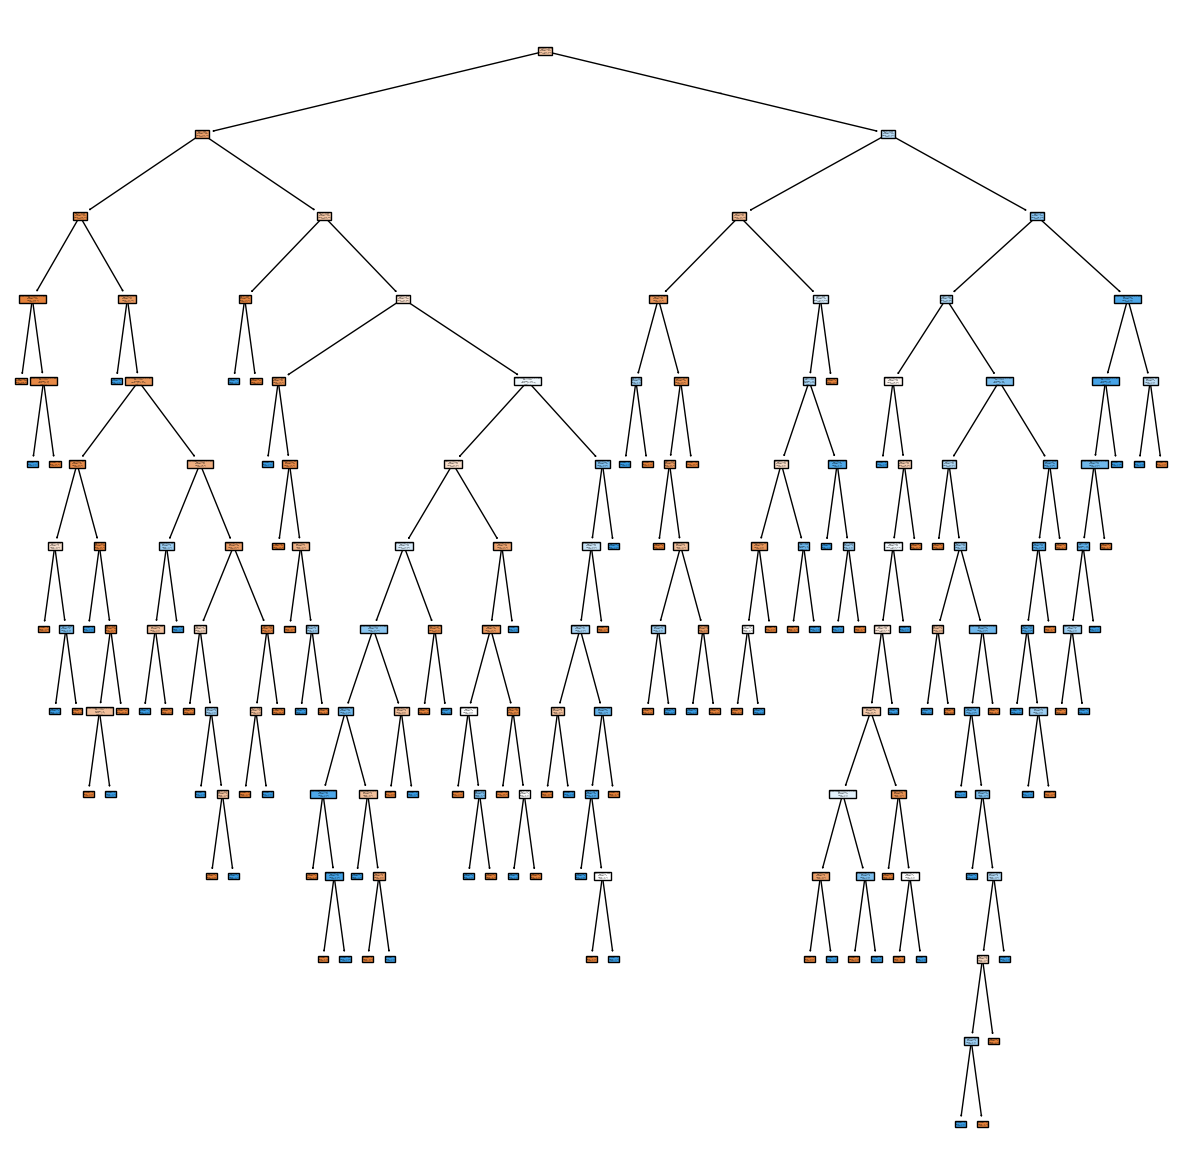

In [99]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(x_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [100]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [101]:
accuracy_score(y_test, y_pred)

0.7467532467532467

In [102]:
hyperparams = {
    "max_depth": [None, 3, 5, 7, 10, 15],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 5, 10, 20, 50],
    "criterion": ["gini", "entropy", "log_loss"]
}

model = DecisionTreeClassifier(random_state = 42)
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = None)
grid

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 7, 10, 15],
                         'min_samples_leaf': [1, 5, 10, 20, 50],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy')

In [103]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 7, 10, 15],
                         'min_samples_leaf': [1, 5, 10, 20, 50],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy')

In [104]:
# Mejor estimador
best_model = grid.best_estimator_

# Mejor combinación de hiperparámetros
best_params = grid.best_params_

# Mostrar el mejor modelo y sus parámetros
print("Mejor modelo:", best_model)
print("Mejores hiperparámetros:", best_params)

Mejor modelo: DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [105]:
# Obtener el mejor modelo
best_model = grid.best_estimator_

# Mostrar el mejor modelo encontrado
print("Mejor estimador: ", best_model)

Mejor estimador:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)


In [106]:
model = DecisionTreeClassifier(criterion='entropy', max_depth= 5, min_samples_split= 4, min_samples_leaf=20, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       min_samples_split=4, random_state=42)

In [107]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [108]:
accuracy_score(y_test, y_pred)

0.7857142857142857